## Red Neuronal 
Predecir Indice API

## Librerias

In [37]:
#librerias

#Tratamiento Datos
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer # Normalizacion de datos


#Red Neuronal
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist #importar dataset mnist (numeros)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import tensorflow as tf

#Graficas
# import matplotlib.pyplot as plt


In [38]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiento Datos**


### Importar Features

In [39]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe ,skipinitialspace=True, skiprows=1

print(dt_Supp_spect.shape)#Ver tamaño dataset
dt_Supp_spect.head() #print dt frame

(59692, 41)


,Molecules\Samples,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#se eliminan estos features, porque no se encuentran registrados en el target
dt_Supp_spect.drop(['Molecules\Samples','CR3', 'CR20', 'CR21','VR3'], axis=1, inplace=True)#Eliminar muestras no disponibles en las propiedades a predecir
# dt_Supp_spect = dt_Supp_spect.drop(dt_Supp_spect.index[[0,3,20,21,24]])
print('shape: ',dt_Supp_spect.shape)
dt_Supp_spect.head() #print dt frame

shape:  (59692, 36)


,CR1,CR2,CR4,CR5,CR6,CR7,CR8,CR9,CR10,CR11,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,16.122,28.754,24.784,2.360,2.252,2.612,2.020,17.854,15.985,14.704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.101,35.596,36.845,10.718,7.076,10.005,11.003,35.712,28.735,20.846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.500,54.152,55.708,25.710,16.029,22.088,28.136,50.344,41.754,38.228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.574,43.425,41.362,43.697,36.075,39.573,46.366,35.953,30.995,53.734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.324,62.510,57.982,37.720,24.171,25.059,41.800,63.023,40.590,40.347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Dataframe Supplementary_CCR_spectra transpose
dt_spec_Transpose = dt_Supp_spect.transpose()
print(dt_spec_Transpose.shape)
dt_spec_Transpose.head()

(36, 59692)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,16.122,30.101,38.500,31.574,52.324,23.838,65.693,47.620,49.053,64.986,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0
CR2,28.754,35.596,54.152,43.425,62.510,37.521,82.040,73.056,66.248,86.506,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0
CR4,24.784,36.845,55.708,41.362,57.982,27.374,82.940,60.110,67.817,79.501,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0
CR5,2.360,10.718,25.710,43.697,37.720,29.929,56.975,26.378,83.384,80.180,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0
CR6,2.252,7.076,16.029,36.075,24.171,47.137,46.952,48.978,58.504,56.834,...,0.0,1.528,1.728,1.702,1.521,1.506,2.188,0.0,0.0,0.0


### Importar datos a predecir

In [42]:
#import target (API) 40 muestras (masas)(Crudos, Fondos/Vacios y Gases)
#Dataframe Supplementary_CCR_properties
dt_Propiedad_API = pd.read_csv('Data/Crudos_Fondos_Propiedades_NombresyEtiquetas.csv',sep=",", decimal=",",skipinitialspace=True, skiprows=1) #import dtframe
print('shape: ',dt_Propiedad_API.shape)
dt_Propiedad_API.head() #print dt frame


shape:  (34, 44)


,Unnamed: 0,S1,S2,S4,Unnamed: 4,S5,S6,S7,S8,S9,...,FV13,FV14,FV15,FV16,FV17,FV18,FV19,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,NaN,Rubiales,Lisama 165,Teca 62,Palagua,Chichimene 97,Nutria 35,Santos 120,Castilla 80,Vasconia-Tropomix,...,Trasgo 1,Aullador 1 DST2,Tisquirama 7,San Francisco 17,Mezcla parafínica,San Fernando,Andalucia sur 10,Tesoro 43,San Roque 3,CSE
1,NaN,200789673,200826607,200866254,201010735,200820720,200825159,200825157,200823420,200798220,...,200817187,200898545,200873436,#REF!,#REF!,200939838,200885472,#REF!,200885486,NaN
2,NaN,CRUDO,CRUDO,CRUDO*,CRUDO,CRUDO,CRUDO,CRUDO,CRUDO*,CRUDO,...,FON,FON,FON,FON,FON,FON,FON,FON,FON,NaN
3,ANALISIS,°C,°C,°C,°C,°C,°C,°C,°C,°C,...,530+,530+,530.+,545+,521.5+,533+,539+,548+,512.2+,NaN
4,NaN,°F,°F,°F,°F,°F,°F,°F,°F,°F,...,987+,986+,986,1013+,970.7+,991.4+,1002+,1018.4+,954.0+,NaN


In [43]:
dt_Propiedad_API.drop(dt_Propiedad_API.loc[0:4].index, inplace=True)
dt_Propiedad_API.drop(dt_Propiedad_API.loc[6:33].index, inplace=True)

In [44]:
print(dt_Propiedad_API.shape)
dt_Propiedad_API

(1, 44)


,Unnamed: 0,S1,S2,S4,Unnamed: 4,S5,S6,S7,S8,S9,...,FV13,FV14,FV15,FV16,FV17,FV18,FV19,Unnamed: 41,Unnamed: 42,Unnamed: 43
5,API 15.6°C (60°F),13.3,21.1,12.1,15.5,9.4,29.7,25.3,12.5,23.1,...,1.9,8.5,8.3,6.2,7.0,1.8,4.9,11.8,9.9,13.6


In [45]:
dt_Propiedad_API=dt_Propiedad_API.transpose()
print(dt_Propiedad_API.shape)
dt_Propiedad_API

(44, 1)


,5
Unnamed: 0,API 15.6°C (60°F)
S1,13.3
S2,21.1
S4,12.1
Unnamed: 4,15.5
S5,9.4
S6,29.7
S7,25.3
S8,12.5
S9,23.1


In [46]:
dt_Propiedad_API = dt_Propiedad_API.drop(dt_Propiedad_API.index[[0,4,11,17,18,41,42,43]])
dt_Propiedad_API[5]['FV5'] = 0.9
dt_Propiedad_API

,5
S1,13.3
S2,21.1
S4,12.1
S5,9.4
S6,29.7
S7,25.3
S8,12.5
S9,23.1
S10,20.0
S11,13.7


In [47]:
# dt_Propiedad_API.dtypes
type(dt_Propiedad_API[5])

pandas.core.series.Series

# **Aplicacion Red Neuronal**


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import Adam

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [83]:
#Definimos las moleculas como Features
# dt_features= dt_spec_Transpose.to_numpy()  #Variables predictoras
dt_features = np.asarray(dt_spec_Transpose).astype(float)
#Definimos API% como Target
# dt_target=dt_Propiedad_API[5].to_numpy()  #Variable Objetivo
dt_target = np.asarray(dt_Propiedad_API[5]).astype(float)
#Normalizacion de datos
# dt_features = Normalizer().fit_transform(dt_features) #Normalizar datos
###################################################
print(dt_features.shape)
print(dt_target.shape)
type(dt_features)

(36, 59692)
(36,)


numpy.ndarray

In [84]:
#Split Datos
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, test_size = 0.8, random_state = 0) #parametro random state permite que siempre su usen las mismas muestras

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
dt_features.shape

(7, 59692)
(7,)
(29, 59692)
(29,)


(36, 59692)

In [86]:
#Normalizacion Datos
def crear_normalizador(data):
    normalizer= Normalization (axis=1)
    normalizer.adapt(np.array(data))
    return normalizer

In [87]:
normalizador = crear_normalizador(X_train)

In [88]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
dt_features.shape

(7, 59692)
(7,)
(29, 59692)
(29,)


(36, 59692)

In [89]:
# Generacion modelo
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.regularizers import L1L2

# def crean_nn_regresion(norm):
    # model = Sequential ([
        # norm,
        # Dense(32, activation='softmax'),
        # Dense(64, activation='softmax'),
        # Dense(32, activation='relu'),
        # Dense(1)
    # ])
    # model.compile(optimizer= Adam(0.002), loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])
    ## model.compile (loss='mean_absolute_error', optimizer= Adam(0.002))
    # return model

In [90]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L1L2

def crean_nn_regresion(norm):
    model = Sequential ([
        norm,
        Dense(16, activation='relu'),
        Dense(32, activation='softmax'),
        Dense(64, activation='softmax'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])
    return model


In [91]:
nn= crean_nn_regresion(normalizador)

In [92]:
# Entrenamiento modelo
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0,
    epochs=300
)

In [93]:
#Valor final Borrar para mas orden al final esta repetido
nn.evaluate(X_train, y_train, verbose=1)
nn.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 64ms/step - loss: 183.2324 - mean_squared_error: 183.2324


[183.23240661621094, 183.23240661621094]

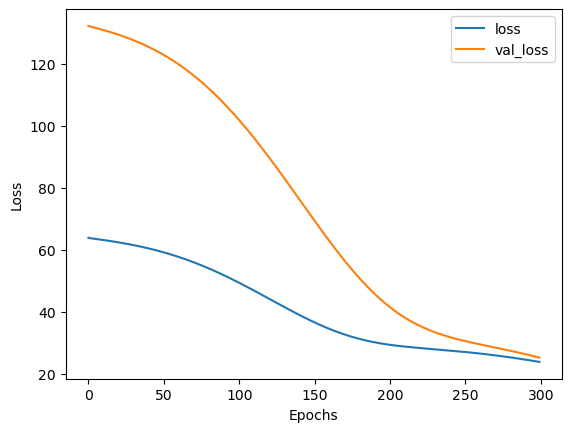

In [94]:
import matplotlib.pyplot as plt

# Plot de pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


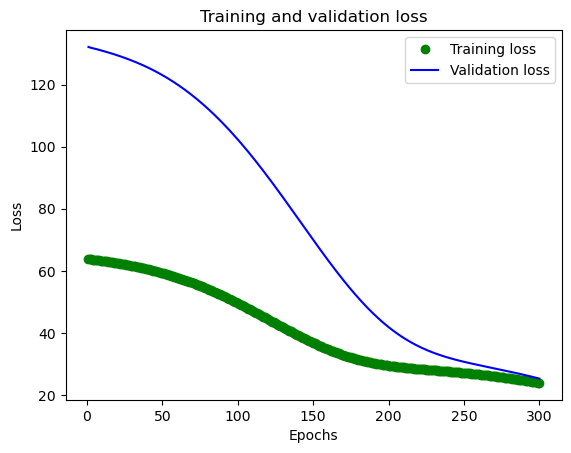

In [95]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_range = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs_range, loss_values, 'go', label='Training loss')
plt.plot(epochs_range, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 [==============================] - 0s 222ms/step


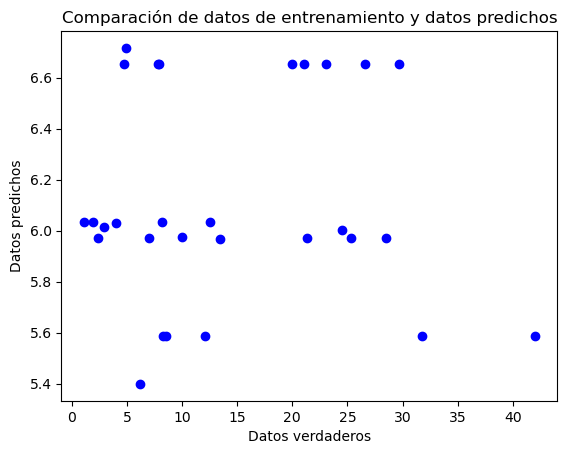

In [96]:
import matplotlib.pyplot as plt

# Realiza las predicciones con el modelo
y_pred = nn.predict(X_test)

# Grafica los datos de entrenamiento y los datos predichos
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Datos verdaderos")
plt.ylabel("Datos predichos")
plt.title("Comparación de datos de entrenamiento y datos predichos")
plt.show()


## Validar Modelo

In [77]:
nn.evaluate(X_train, y_train, verbose=1)
nn.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 80ms/step - loss: 314.0739 - mean_squared_error: 314.0739


[314.0738830566406, 314.0738830566406]

In [78]:
## Predicciones
y_pred = nn.predict(X_train).flatten()
y_pred_test= nn.predict(X_test).flatten()



1/1 [==============================] - 0s 88ms/step


## Grafica

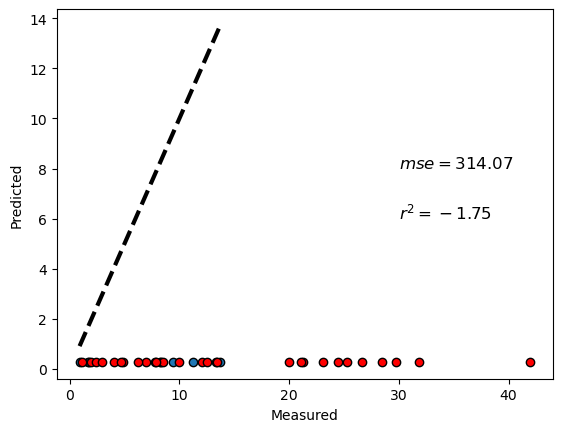

In [81]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,8, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(30,6, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Predecir en datos nuevos 

In [80]:
datos_prueba = pd.read_csv("Data/DatosPrueba.csv", sep="\t", decimal=",")
datos_prueba.head()

,CR1
0,16.122
1,30.101
2,38.500
3,31.574
4,52.324


In [67]:
datos_prueba = datos_prueba.transpose()


In [68]:
datos_prueba

,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,16.122,30.101,38.5,31.574,52.324,23.838,65.693,47.62,49.053,64.986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
predicciones = nn.predict(datos_prueba)
print(predicciones)

1/1 [==============================] - 0s 168ms/step
[[5.6311636]]
